In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/commandes-robot/sensor_readings_4.csv
/kaggle/input/commandes-robot/sensor_readings_24.csv


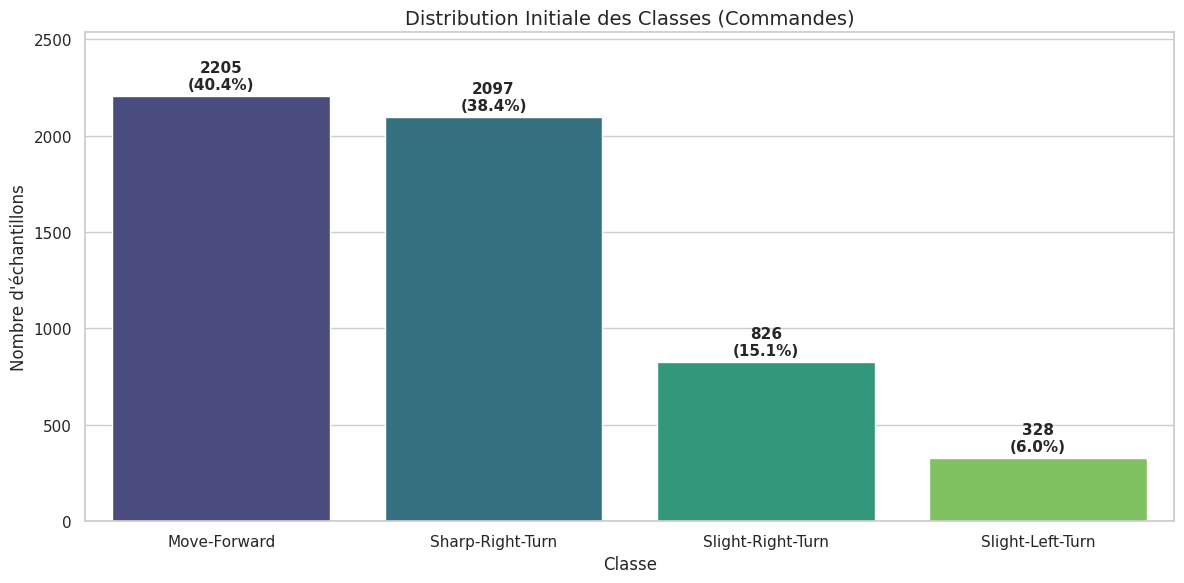

Classes détectées : ['Move-Forward' 'Sharp-Right-Turn' 'Slight-Left-Turn' 'Slight-Right-Turn']
Shape X (Features) : (5456, 4)
Shape y (Labels)   : (5456, 4)
Exemple d'encodage : ['Slight-Right-Turn'] -> [0. 0. 0. 1.]
Train set : 4364 échantillons
Test set  : 1092 échantillons


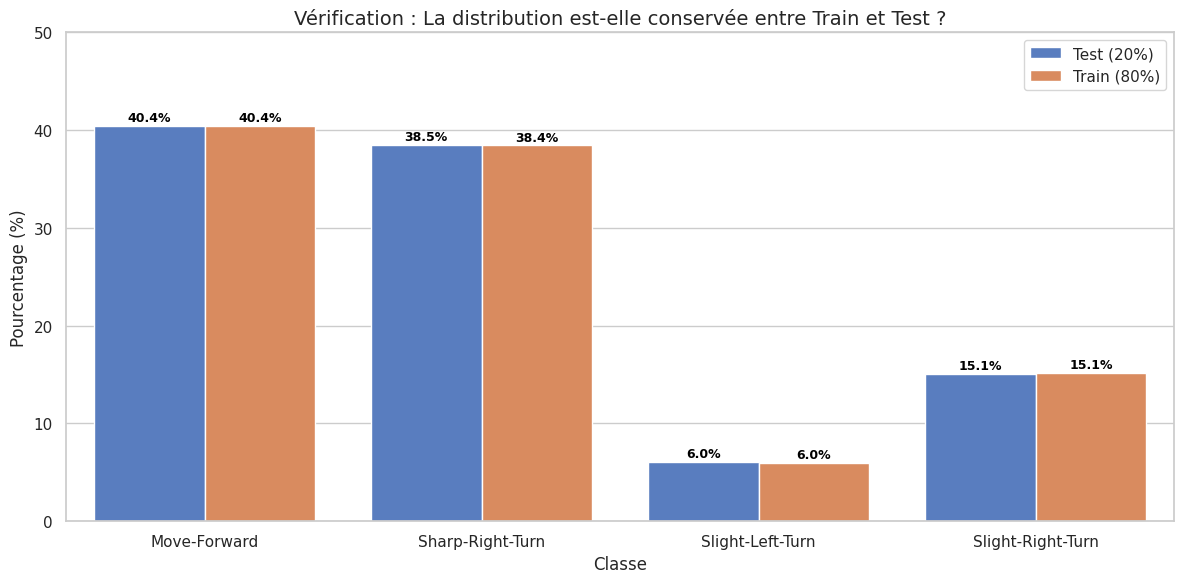

Code terminé. Si les deux graphiques montrent des barres cohérentes, la préparation est validée.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Configuration pour des graphiques lisibles
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ÉTAPE 1 : CHARGEMENT ET EXPLORATION INITIALE

# Définition des colonnes (le CSV n'a pas d'en-tête)
columns = ["Front", "Left", "Right", "Back", "Command"]
df = pd.read_csv("/kaggle/input/commandes-robot/sensor_readings_4.csv", header=None, names=columns)

# Calcul des statistiques de distribution
class_counts = df['Command'].value_counts()
total_samples = len(df)

# Visualisation 1 : Distribution Initiale
plt.figure()
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis", hue=class_counts.index, legend=False)

# Ajout des annotations (Nombre + Pourcentage)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_samples) * 100
    ax.text(p.get_x() + p.get_width()/2., height + 20,
            f'{int(height)}\n({percentage:.1f}%)',
            ha="center", va="bottom", fontsize=11, fontweight='bold')

plt.title("Distribution Initiale des Classes (Commandes)", fontsize=14)
plt.ylabel("Nombre d'échantillons")
plt.xlabel("Classe")
plt.ylim(0, max(class_counts.values) * 1.15)
plt.tight_layout()
plt.show()

# ÉTAPE 2 : ENCODAGE ET PRÉPARATION

X = df.drop("Command", axis=1).values.astype(np.float32)
y_str = df[["Command"]].values

# Encodage One-Hot 
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y_str)
class_names = encoder.categories_[0]

print(f"Classes détectées : {class_names}")
print(f"Shape X (Features) : {X.shape}")
print(f"Shape y (Labels)   : {y_encoded.shape}")
print(f"Exemple d'encodage : {y_str[0]} -> {y_encoded[0]}")


# ÉTAPE 3 : SÉPARATION TRAIN / TEST (STRATIFIÉE)

# On garde 20% pour le test, en respectant les proportions des classes 
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

print(f"Train set : {X_train.shape[0]} échantillons")
print(f"Test set  : {X_test.shape[0]} échantillons")

# =============================================================================
# ÉTAPE 4 : VÉRIFICATION DE LA STRATIFICATION

# Reconversion inverse pour l'affichage (One-Hot -> Noms de classes)
y_train_labels = class_names[np.argmax(y_train, axis=1)]
y_test_labels = class_names[np.argmax(y_test, axis=1)]

# Création d'un DataFrame pour le graphique comparatif
df_viz = pd.concat([
    pd.DataFrame({'Classe': y_train_labels, 'Jeu': 'Train (80%)'}),
    pd.DataFrame({'Classe': y_test_labels, 'Jeu': 'Test (20%)'})
])

# Calcul des pourcentages par jeu
df_viz_pct = (df_viz
 .groupby(['Jeu', 'Classe'])
 .size()
 .reset_index(name='Nombre'))

def calc_pct(row):
    total = len(y_train) if 'Train' in row['Jeu'] else len(y_test)
    return (row['Nombre'] / total) * 100

df_viz_pct['Pourcentage'] = df_viz_pct.apply(calc_pct, axis=1)

# Visualisation 2 : Comparaison Train vs Test
plt.figure()
ax2 = sns.barplot(x='Classe', y='Pourcentage', hue='Jeu', data=df_viz_pct, palette='muted')

# Annotations
for p in ax2.patches:
    height = p.get_height()
    if height > 0:
        ax2.text(p.get_x() + p.get_width()/2., height + 0.5,
                f'{height:.1f}%',
                ha="center", fontsize=9, fontweight='bold', color='black')

plt.title("Vérification : La distribution est-elle conservée entre Train et Test ?", fontsize=14)
plt.ylabel("Pourcentage (%)")
plt.ylim(0, 50)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print("Code terminé. Si les deux graphiques montrent des barres cohérentes, la préparation est validée.")

2026-01-16 13:10:52.858853: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768569053.303521      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768569053.432190      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768569054.464101      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768569054.464164      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768569054.464168      55 computation_placer.cc:177] computation placer alr

Nombre d'architectures : 23
Nombre de répétitions par architecture : 3
------------------------------------------------------------
[1/23] Architecture [20]            : 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2026-01-16 13:11:13.812690: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Moyenne = 0.9640 (+/- 0.0023)
[2/23] Architecture [15]            : Moyenne = 0.9600 (+/- 0.0041)
[3/23] Architecture [10]            : Moyenne = 0.9399 (+/- 0.0037)
[4/23] Architecture [8]             : Moyenne = 0.9389 (+/- 0.0024)
[5/23] Architecture [6]             : Moyenne = 0.8764 (+/- 0.1107)
[6/23] Architecture [4]             : Moyenne = 0.9219 (+/- 0.0089)
[7/23] Architecture [20, 15]        : Moyenne = 0.9670 (+/- 0.0112)
[8/23] Architecture [20, 10]        : Moyenne = 0.9676 (+/- 0.0098)
[9/23] Architecture [20, 8]         : Moyenne = 0.9686 (+/- 0.0089)
[10/23] Architecture [20, 6]         : Moyenne = 0.9173 (+/- 0.0583)
[11/23] Architecture [20, 4]         : Moyenne = 0.8996 (+/- 0.0870)
[12/23] Architecture [15, 10]        : Moyenne = 0.9689 (+/- 0.0110)
[13/23] Architecture [15, 8]         : Moyenne = 0.9658 (+/- 0.0127)
[14/23] Architecture [15, 6]         : Moyenne = 0.9625 (+/- 0.0079)
[15/23] Architecture [15, 4]         : Moyenne = 0.9637 (+/- 0.0091)
[16/23] Arch

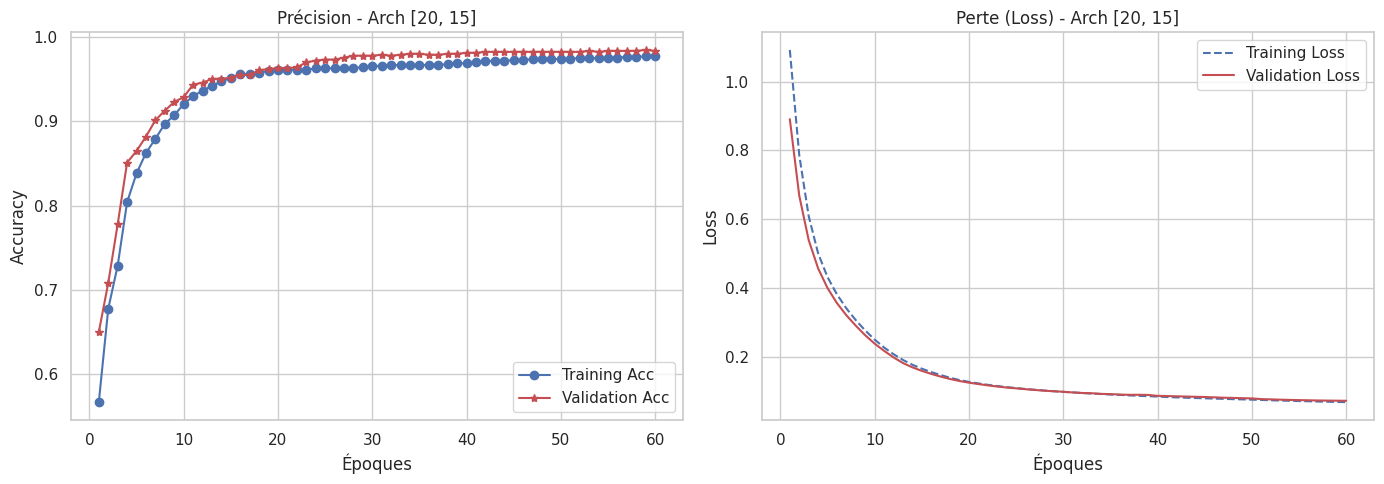

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# ÉTAPE 3 : COMPÉTITION ROBUSTE (3 SEEDS PAR ARCHITECTURE)

# 1. Définition des architectures (Triangulaires)
neurones_possibles = [20, 15, 10, 8, 6, 4]
architectures = []

# 1 couche
for n in neurones_possibles:
    architectures.append([n])
# 2 couches (décroissant)
for n1 in neurones_possibles:
    for n2 in neurones_possibles:
        if n1 > n2:
            architectures.append([n1, n2])
# 3 couches (exemples)
architectures.append([20, 10, 4])
architectures.append([15, 8, 4])

print(f"Nombre d'architectures : {len(architectures)}")
print(f"Nombre de répétitions par architecture : 3")
print("-" * 60)

# 2. Boucle d'entraînement
results_stats = []
best_global_acc = 0.0
best_model_final = None
best_history_final = None
best_arch_final = ""

SEEDS = [42, 123, 999]  # Les 3 graines pour la reproductibilité

for i, arch in enumerate(architectures):
    accuracies = []
    
    print(f"[{i+1}/{len(architectures)}] Architecture {str(arch):<15} : ", end="")
    
    # On lance 3 fois l'entraînement pour cette architecture
    for seed in SEEDS:
        # Fixer les graines pour la reproductibilité de ce run
        tf.random.set_seed(seed)
        np.random.seed(seed)
        
        # Construction
        model = Sequential()
        model.add(InputLayer(input_shape=(4,)))
        for neurons in arch:
            model.add(Dense(neurons, activation='relu'))
        model.add(Dense(4, activation='softmax'))
        
        model.compile(optimizer=Adam(learning_rate=0.002), # Un peu plus agressif
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        
        # Entraînement
        es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
        history = model.fit(X_train, y_train, 
                            epochs=60, batch_size=32, validation_split=0.2, 
                            callbacks=[es], verbose=0)
        
        # Évaluation
        _, acc = model.evaluate(X_test, y_test, verbose=0)
        accuracies.append(acc)
        
        # Si c'est le meilleur run absolu, on le garde pour les graphiques
        if acc > best_global_acc:
            best_global_acc = acc
            best_model_final = model
            best_history_final = history
            best_arch_final = str(arch)
            
    # Calcul des stats pour cette architecture
    mean_acc = np.mean(accuracies)
    std_acc = np.std(accuracies)
    
    print(f"Moyenne = {mean_acc:.4f} (+/- {std_acc:.4f})")
    
    results_stats.append({
        'Architecture': str(arch),
        'Mean_Acc': mean_acc,
        'Std_Dev': std_acc,
        'Best_Run': max(accuracies)
    })


# ÉTAPE 4 : ANALYSE ET COURBES D'APPRENTISSAGE


# Classement par précision moyenne
df_results = pd.DataFrame(results_stats).sort_values(by='Mean_Acc', ascending=False)
print("TOP 5 ARCHITECTURES (Moyenne sur 3 essais) :")
print(df_results.head(5))

print(f"\nMEILLEUR MODÈLE  : Architecture {best_arch_final}")
print(f"   Performance Test : {best_global_acc:.4f}")

# TRACÉ DES COURBES (Demandé par l'utilisateur)
if best_history_final:
    acc = best_history_final.history['accuracy']
    val_acc = best_history_final.history['val_accuracy']
    loss = best_history_final.history['loss']
    val_loss = best_history_final.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Graphique 1 : Précision
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Acc')
    plt.plot(epochs, val_acc, 'r*-', label='Validation Acc')
    plt.title(f'Précision - Arch {best_arch_final}')
    plt.xlabel('Époques')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Graphique 2 : Perte (Loss)
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b--', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title(f'Perte (Loss) - Arch {best_arch_final}')
    plt.xlabel('Époques')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("Erreur : Aucun historique trouvé.")

Calcul des prédictions sur le jeu de test...

--- MATRICE DE CONFUSION ---


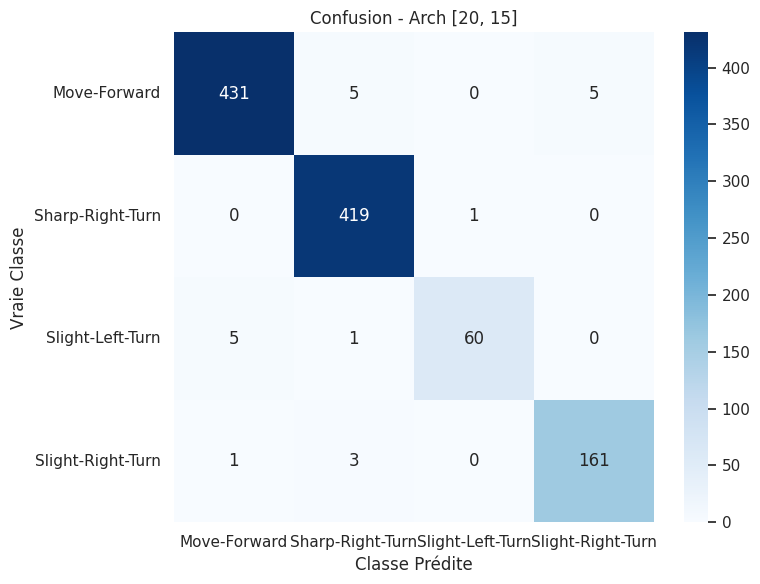


--- RAPPORT DE PERFORMANCES ---
                   precision    recall  f1-score   support

     Move-Forward       0.99      0.98      0.98       441
 Sharp-Right-Turn       0.98      1.00      0.99       420
 Slight-Left-Turn       0.98      0.91      0.94        66
Slight-Right-Turn       0.97      0.98      0.97       165

         accuracy                           0.98      1092
        macro avg       0.98      0.96      0.97      1092
     weighted avg       0.98      0.98      0.98      1092


--- ANALYSE DE SENSIBILITÉ (SHAP) ---
Cette étape identifie quels capteurs pèsent le plus dans la décision.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━

/tmp/ipykernel_55/1104160261.py:45: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:50],
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: Fut

<Figure size 1200x600 with 0 Axes>

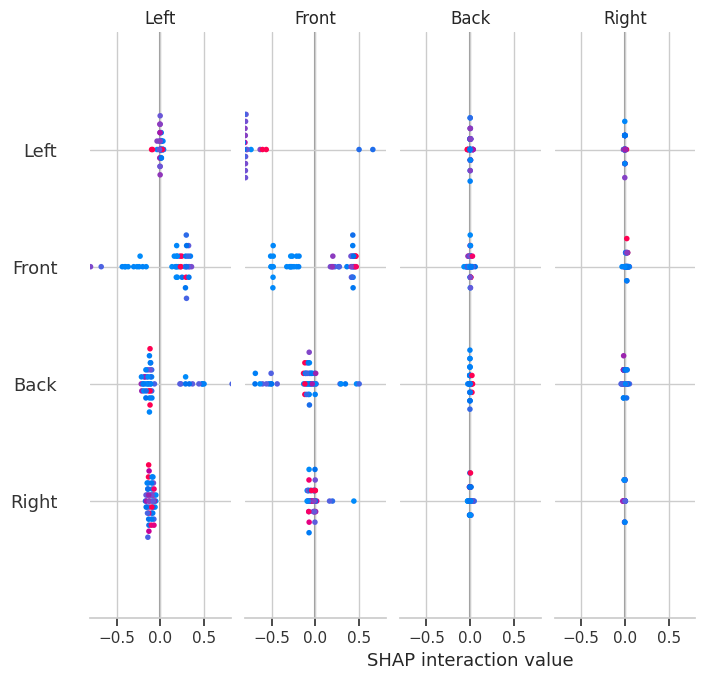


--- EXEMPLES DE DÉCISIONS ---
Capteurs (Front, Left, Right, Back) | Vrai                 | Prédit              
--------------------------------------------------------------------------------
['1.40', '0.49', '1.80', '1.04']    | Slight-Right-Turn    | Slight-Right-Turn    VRAI
['1.32', '0.62', '1.53', '0.86']    | Move-Forward         | Move-Forward         VRAI
['0.81', '0.53', '1.69', '1.30']    | Sharp-Right-Turn     | Sharp-Right-Turn     VRAI
['0.92', '0.59', '1.73', '1.19']    | Move-Forward         | Move-Forward         VRAI
['1.01', '0.56', '3.16', '1.20']    | Move-Forward         | Move-Forward         VRAI


In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import shap

# --- 1. PRÉDICTIONS ---
print("Calcul des prédictions sur le jeu de test...")
y_pred_prob = best_model_final.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# --- 2. MATRICE DE CONFUSION ---
print("\n--- MATRICE DE CONFUSION ---")
cm = confusion_matrix(y_true, y_pred)
    
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion - Arch {best_arch_final}")
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.tight_layout()
plt.show()

# --- 3. RAPPORT DE CLASSIFICATION ---
print("\n--- RAPPORT DE PERFORMANCES ---")
print(classification_report(y_true, y_pred, target_names=class_names))

# --- 4. ANALYSE SHAP (INTERPRÉTABILITÉ) ---
print("\n--- ANALYSE DE SENSIBILITÉ (SHAP) ---")
print("Cette étape identifie quels capteurs pèsent le plus dans la décision.")
    

# On utilise un résumé (kmeans) du train set pour accélérer le calcul
# car calculer SHAP sur tout le dataset est très long.
X_train_summary = shap.kmeans(X_train, 20) 
        
# Création de l'explainer
explainer = shap.KernelExplainer(best_model_final.predict, X_train_summary)
        
# Calcul des valeurs SHAP sur un échantillon du test (ex: 50 points)
shap_values = explainer.shap_values(X_test[:50])
        
# Le Summary Plot
plt.figure()
shap.summary_plot(shap_values, X_test[:50], 
                        feature_names=["Front", "Left", "Right", "Back"], 
                        class_names=class_names)


# --- 5. EXEMPLE CONCRET ---
print("\n--- EXEMPLES DE DÉCISIONS ---")
print(f"{'Capteurs (Front, Left, Right, Back)':<35} | {'Vrai':<20} | {'Prédit':<20}")
print("-" * 80)
for i in range(5): # On montre 5 exemples au hasard
    idx = np.random.randint(0, len(X_test))
    vals = [f"{v:.2f}" for v in X_test[idx]]
    vrai = class_names[y_true[idx]]
    pred = class_names[y_pred[idx]]
    status = "VRAI" if vrai == pred else "FAUX"
    print(f"{str(vals):<35} | {vrai:<20} | {pred:<20} {status}")

In [10]:
classification_model_path = "/kaggle/working/best_model_classification.keras"
best_model_final.save(classification_model_path)

In [11]:
import joblib
# Sauvegarde
joblib.dump(encoder, "/kaggle/working/label_encoder_command.pkl")

['/kaggle/working/label_encoder_command.pkl']